In [1]:
import numpy as np
import matplotlib.pyplot as plt
import solver.exact_solve as exact
import solver.piqs_solve as piqs
import utils

utils imported


Run time: 6.164229154586792s
6 spins, Td = 0.7975260416666664, Tmes = 0.8070570570570571


KeyboardInterrupt: 

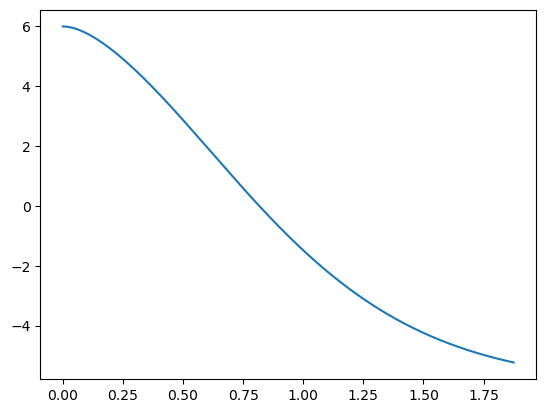

In [2]:
gk = 1.6
kappa = 20
delta_a = 0
delta_c = 0
N_spin = [6,8,10,12]
tlist = np.linspace(0,3.0/gk,int(1e3))
for N in N_spin:
    ps = piqs.sys(N, 40, delta_a, delta_c, gk)
    ps_out = ps.run_mesolve(tlist, [np.sqrt(kappa)* ps.a_tot], [ps.jz_tot, ps.ada_tot])
    Td = utils.delay_time(gk, N, kappa)
    Tmes = utils.ind_where(ps_out.expect[0], 0, 0.1)
    print(f"{N} spins, Td = {Td}, Tmes = {tlist[Tmes]}")
    plt.plot(tlist, ps_out.expect[0], label=str(N))
plt.legend()